# ETL Pipeline Preparation
Follow the instructions below to help you create your ETL pipeline.
### 1. Import libraries and load datasets.
- Import Python libraries
- Load `messages.csv` into a dataframe and inspect the first few lines.
- Load `categories.csv` into a dataframe and inspect the first few lines.

In [55]:
# import libraries
import pandas as pd
from sqlalchemy import create_engine
import seaborn as sb

In [2]:
# load messages dataset
messages = pd.read_csv('messages.csv')
messages.head()

,id,message,original,genre
0,2,Weather update - a cold front from Cuba that c...,Un front froid se retrouve sur Cuba ce matin. ...,direct
1,7,Is the Hurricane over or is it not over,Cyclone nan fini osinon li pa fini,direct
2,8,Looking for someone but no name,"Patnm, di Maryani relem pou li banm nouvel li ...",direct
3,9,UN reports Leogane 80-90 destroyed. Only Hospi...,UN reports Leogane 80-90 destroyed. Only Hospi...,direct
4,12,"says: west side of Haiti, rest of the country ...",facade ouest d Haiti et le reste du pays aujou...,direct


In [3]:
# load categories dataset
categories = pd.read_csv('categories.csv')
categories.head()

,id,categories
0,2,related-1;request-0;offer-0;aid_related-0;medi...
1,7,related-1;request-0;offer-0;aid_related-1;medi...
2,8,related-1;request-0;offer-0;aid_related-0;medi...
3,9,related-1;request-1;offer-0;aid_related-1;medi...
4,12,related-1;request-0;offer-0;aid_related-0;medi...


### 2. Merge datasets.
- Merge the messages and categories datasets using the common id
- Assign this combined dataset to `df`, which will be cleaned in the following steps

In [4]:
# merge datasets
df = messages.merge(categories, on='id', how='left')
df.head()

,id,message,original,genre,categories
0,2,Weather update - a cold front from Cuba that c...,Un front froid se retrouve sur Cuba ce matin. ...,direct,related-1;request-0;offer-0;aid_related-0;medi...
1,7,Is the Hurricane over or is it not over,Cyclone nan fini osinon li pa fini,direct,related-1;request-0;offer-0;aid_related-1;medi...
2,8,Looking for someone but no name,"Patnm, di Maryani relem pou li banm nouvel li ...",direct,related-1;request-0;offer-0;aid_related-0;medi...
3,9,UN reports Leogane 80-90 destroyed. Only Hospi...,UN reports Leogane 80-90 destroyed. Only Hospi...,direct,related-1;request-1;offer-0;aid_related-1;medi...
4,12,"says: west side of Haiti, rest of the country ...",facade ouest d Haiti et le reste du pays aujou...,direct,related-1;request-0;offer-0;aid_related-0;medi...


### 3. Split `categories` into separate category columns.
- Split the values in the `categories` column on the `;` character so that each value becomes a separate column. You'll find [this method](https://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.Series.str.split.html) very helpful! Make sure to set `expand=True`.
- Use the first row of categories dataframe to create column names for the categories data.
- Rename columns of `categories` with new column names.

In [5]:
# create a dataframe of the 36 individual category columns
categories = df['categories'].str.split(';', expand = True)
#cat_names = categories.iloc[0].values
#categories.columns = cat_names
categories.head()

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
0,related-1,request-0,offer-0,aid_related-0,medical_help-0,medical_products-0,search_and_rescue-0,security-0,military-0,child_alone-0,...,aid_centers-0,other_infrastructure-0,weather_related-0,floods-0,storm-0,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0
1,related-1,request-0,offer-0,aid_related-1,medical_help-0,medical_products-0,search_and_rescue-0,security-0,military-0,child_alone-0,...,aid_centers-0,other_infrastructure-0,weather_related-1,floods-0,storm-1,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0
2,related-1,request-0,offer-0,aid_related-0,medical_help-0,medical_products-0,search_and_rescue-0,security-0,military-0,child_alone-0,...,aid_centers-0,other_infrastructure-0,weather_related-0,floods-0,storm-0,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0
3,related-1,request-1,offer-0,aid_related-1,medical_help-0,medical_products-1,search_and_rescue-0,security-0,military-0,child_alone-0,...,aid_centers-0,other_infrastructure-0,weather_related-0,floods-0,storm-0,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0
4,related-1,request-0,offer-0,aid_related-0,medical_help-0,medical_products-0,search_and_rescue-0,security-0,military-0,child_alone-0,...,aid_centers-0,other_infrastructure-0,weather_related-0,floods-0,storm-0,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0


In [6]:
# select the first row of the categories dataframe
row = categories.iloc[0].values

# use this row to extract a list of new column names for categories.
# one way is to apply a lambda function that takes everything 
# up to the second to last character of each string with slicing
category_colnames = [(lambda string: string.split('-')[0])(string) for string in row]
print(category_colnames)

['related', 'request', 'offer', 'aid_related', 'medical_help', 'medical_products', 'search_and_rescue', 'security', 'military', 'child_alone', 'water', 'food', 'shelter', 'clothing', 'money', 'missing_people', 'refugees', 'death', 'other_aid', 'infrastructure_related', 'transport', 'buildings', 'electricity', 'tools', 'hospitals', 'shops', 'aid_centers', 'other_infrastructure', 'weather_related', 'floods', 'storm', 'fire', 'earthquake', 'cold', 'other_weather', 'direct_report']


In [7]:
# rename the columns of `categories`
categories.columns = category_colnames
categories.head()

,related,request,offer,aid_related,medical_help,medical_products,search_and_rescue,security,military,child_alone,...,aid_centers,other_infrastructure,weather_related,floods,storm,fire,earthquake,cold,other_weather,direct_report
0,related-1,request-0,offer-0,aid_related-0,medical_help-0,medical_products-0,search_and_rescue-0,security-0,military-0,child_alone-0,...,aid_centers-0,other_infrastructure-0,weather_related-0,floods-0,storm-0,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0
1,related-1,request-0,offer-0,aid_related-1,medical_help-0,medical_products-0,search_and_rescue-0,security-0,military-0,child_alone-0,...,aid_centers-0,other_infrastructure-0,weather_related-1,floods-0,storm-1,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0
2,related-1,request-0,offer-0,aid_related-0,medical_help-0,medical_products-0,search_and_rescue-0,security-0,military-0,child_alone-0,...,aid_centers-0,other_infrastructure-0,weather_related-0,floods-0,storm-0,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0
3,related-1,request-1,offer-0,aid_related-1,medical_help-0,medical_products-1,search_and_rescue-0,security-0,military-0,child_alone-0,...,aid_centers-0,other_infrastructure-0,weather_related-0,floods-0,storm-0,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0
4,related-1,request-0,offer-0,aid_related-0,medical_help-0,medical_products-0,search_and_rescue-0,security-0,military-0,child_alone-0,...,aid_centers-0,other_infrastructure-0,weather_related-0,floods-0,storm-0,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0


### 4. Convert category values to just numbers 0 or 1.
- Iterate through the category columns in df to keep only the last character of each string (the 1 or 0). For example, `related-0` becomes `0`, `related-1` becomes `1`. Convert the string to a numeric value.
- You can perform [normal string actions on Pandas Series](https://pandas.pydata.org/pandas-docs/stable/text.html#indexing-with-str), like indexing, by including `.str` after the Series. You may need to first convert the Series to be of type string, which you can do with `astype(str)`.

In [8]:
for column in categories:
    # set each value to be the last character of the string
    categories[column] = pd.to_numeric(categories[column].str[-1])
    
    # convert column from string to numeric
    #categories[column] = 
categories.head()

,related,request,offer,aid_related,medical_help,medical_products,search_and_rescue,security,military,child_alone,...,aid_centers,other_infrastructure,weather_related,floods,storm,fire,earthquake,cold,other_weather,direct_report
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,1,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### 5. Replace `categories` column in `df` with new category columns.
- Drop the categories column from the df dataframe since it is no longer needed.
- Concatenate df and categories data frames.

In [9]:
# drop the original categories column from `df`
df.drop(['categories'], axis=1, inplace=True)

df.head()

,id,message,original,genre
0,2,Weather update - a cold front from Cuba that c...,Un front froid se retrouve sur Cuba ce matin. ...,direct
1,7,Is the Hurricane over or is it not over,Cyclone nan fini osinon li pa fini,direct
2,8,Looking for someone but no name,"Patnm, di Maryani relem pou li banm nouvel li ...",direct
3,9,UN reports Leogane 80-90 destroyed. Only Hospi...,UN reports Leogane 80-90 destroyed. Only Hospi...,direct
4,12,"says: west side of Haiti, rest of the country ...",facade ouest d Haiti et le reste du pays aujou...,direct


In [10]:
# concatenate the original dataframe with the new `categories` dataframe
df = pd.concat([df, categories], axis = 1)
df.head()

,id,message,original,genre,related,request,offer,aid_related,medical_help,medical_products,...,aid_centers,other_infrastructure,weather_related,floods,storm,fire,earthquake,cold,other_weather,direct_report
0,2,Weather update - a cold front from Cuba that c...,Un front froid se retrouve sur Cuba ce matin. ...,direct,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7,Is the Hurricane over or is it not over,Cyclone nan fini osinon li pa fini,direct,1,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0
2,8,Looking for someone but no name,"Patnm, di Maryani relem pou li banm nouvel li ...",direct,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9,UN reports Leogane 80-90 destroyed. Only Hospi...,UN reports Leogane 80-90 destroyed. Only Hospi...,direct,1,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,12,"says: west side of Haiti, rest of the country ...",facade ouest d Haiti et le reste du pays aujou...,direct,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### 6. Remove duplicates.
- Check how many duplicates are in this dataset.
- Drop the duplicates.
- Confirm duplicates were removed.

In [11]:
# check number of duplicates
sum(df.duplicated())

170

In [12]:
# drop duplicates
df.drop_duplicates(inplace = True)

In [13]:
# check number of duplicates
sum(df.duplicated())

0

### 7. Save the clean dataset into an sqlite database.
You can do this with pandas [`to_sql` method](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.to_sql.html) combined with the SQLAlchemy library. Remember to import SQLAlchemy's `create_engine` in the first cell of this notebook to use it below.

In [14]:
engine = create_engine('sqlite:///DisasterResponse.db')
df.to_sql('DataFrame', engine, index=False)

### 8. Use this notebook to complete `etl_pipeline.py`
Use the template file attached in the Resources folder to write a script that runs the steps above to create a database based on new datasets specified by the user. Alternatively, you can complete `etl_pipeline.py` in the classroom on the `Project Workspace IDE` coming later.

In [15]:
#helper class for analysis
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
import pandas as pd

class DataFrameAnalyzer:
    
    def __init__(self, df, datetimeColumns = []):
        self.df_ = df
        for col in self.df_.columns:
            if len(self.df_[col].unique()) == 1:
                print('Column :"' + col + '" deleted since it has only one distinct feature: ' + str(self.df_[col].unique()))
                self.df_.drop(col, inplace = True, axis = 1)
        for datetimeColumn in datetimeColumns:
            self.df_[datetimeColumn] = pd.to_datetime(self.df_[datetimeColumn])
        self.y = []
        self.X_num = np.append(self.df_.select_dtypes(include=['integer']).columns, self.df_.select_dtypes(include=['float']).columns)
        self.X_cat = self.df_.select_dtypes(include=['object', 'bool']).columns
        self.X_calc = []
        self.dates = datetimeColumns
        
    def getDf(self, kind = 'reduced'):
        selector = []
        if (kind == 'reduced'):
            [selector.append(entry) for entry in self.dates]
            [selector.append(entry) for entry in self.X_num]
            [selector.append(entry) for entry in self.X_cat]
            [selector.append(entry) for entry in self.X_calc]
            [selector.append(entry) for entry in self.y]
            return self.df_[selector]
        elif (kind == 'model_num'):
            [selector.append(entry) for entry in self.X_num]
            [selector.append(entry) for entry in self.X_calc]
            return self.df_[selector]
        elif (kind == 'model_cat'):
            [selector.append(entry) for entry in self.X_cat]
            return self.df_[selector]
        elif (kind == 'model_resp'):
            [selector.append(entry) for entry in self.y]
            return self.df_[selector]
        else:
            return self.df_
    
    def getCategoricals(self):
        return pd.DataFrame(self.getDf().select_dtypes(include=['object']))
    
    def getCategoricalColumnNames(self):
        return list(self.getCategoricals().columns)
    
    def getCategoricalColumnNamesWithLessThanXUniques(self, x):
        findings = []
        df_cat = self.getCategoricals()
        for column in df_cat.columns:
            if df_cat[column].nunique() < x:
                findings.append(column)
        return findings
    
    def getNumericals(self):
        return self.getDf().select_dtypes(include=['float', 'int'])
    
    def getNumericalColumnNames(self):
        return list(self.getNumericals().columns)
    
    def setRespColumn(self, value):
        self.y = value
    
    def analyseStringTypeStatistics(self):
        df_cats = self.getCategoricals()
        for column in df_cats.columns:
            print('Unique values and occurances for "' + column + '"')
            print(str(df_cats[column].value_counts() / df_cats.shape[0]) + '\n\n')
        return None
    
    def showNoOfUniques(self):
        df_cat = self.getCategoricals()
        print('Number of unique values in:')
        print(df_cat.nunique().sort_values(ascending = False))
        return None
    
    def numberOfNaNs(self):
        print('Percentage of NaNs in:')
        return (self.getDf().isnull().sum() / self.getDf().shape[1]).sort_values(ascending = True)
    
    def selectXLessNaNs(self, x):
        return (self.getDf()[(self.numberOfNaNs()[0:x].index)])
    
    def GroupAggCount(self, group, agg_dict, counter_channel, counterchannelname = 'occurances', sort_chan_position = 0):
        '''
        INPUT:
        group - columns to be grouped by
        agg_dict - dictionary to connect columns to aggregation functions like mean, 
                    sum or mode (lambda x:x.value_counts().index[0])
        counter_channel - which column should be counted (use a column name not used before)?
        counterchannelname - whats the name of the count-column?
        sort_chan_position - sort by this column name
        
        OUTPUT:
        df - a grouped dataframe using defined aggregation methods and a count column
        '''
        agg_dict[counter_channel] = 'size'
        keys = list(agg_dict.keys())
        values = list(agg_dict.values())
        rename_dict = {}
        for i in range(len(agg_dict) - 1):
            rename_dict[keys[i]] = (str(values[i]) + '(' + keys[i] + ')')
        rename_dict[counter_channel] = counterchannelname
        if (sort_chan_position) == (len(values) - 1):
            sortVar = counterchannelname
        else:
            sortVar = str(values[sort_chan_position]) + '(' + keys[sort_chan_position] + ')'
        return self.getDf().groupby(group).agg(agg_dict).rename(columns=rename_dict).sort_values(by = sortVar, ascending = True)
    
    def mostFrequentOccurencesOf(self, column, howMany):
        '''
        INPUT:
        column - column to count the occurances
        howMany - how many of the most frequent occurences should be used 
        
        OUTPUT:
        df - a dataframe without the least frequent occuring elements
        '''
        return self.getDf()[self.getDf()[column].isin(self.getDf().groupby(column)[column].count().sort_values(ascending = False).index[0:howMany])]
    
    def heatMap(self, catVarNameList2D, valueName, kind = 'mean'):
        '''
        INPUT:
        catVarNameList2D - list with names of the two categorical columns in focus
        valueName - name of the numeric column
        kind - how to aggregate the numeric values (mean, sum, count, percentage)
        '''
        if (kind == 'sum'):
            cat = self.getDf().groupby(catVarNameList2D).sum()[valueName]
            cat = cat.reset_index(name = 'sum(' + valueName + ')')
            cat = cat.pivot(index = catVarNameList2D[1], columns = catVarNameList2D[0],
                                        values = 'sum(' + valueName + ')')
            sb.heatmap(cat, annot = True, fmt = '.3f',
                       cbar_kws = {'label' : 'sum(' + valueName + ')'})
        elif (kind == 'count'):
            cat = self.getDf().groupby(catVarNameList2D).count()[valueName]
            cat = cat.reset_index(name = 'count(' + valueName + ')')
            cat = cat.pivot(index = catVarNameList2D[1], columns = catVarNameList2D[0],
                                        values = 'count(' + valueName + ')')
            sb.heatmap(cat, annot = True, fmt = '.0f',
                       cbar_kws = {'label' : 'occurances of combinations'})
        elif (kind == 'percentage'):
            cat = self.getDf().groupby(catVarNameList2D).count()[valueName]
            cat = cat.reset_index(name = 'count(' + valueName + ')')
            cat['count(' + valueName + ')'] = cat['count(' + valueName + ')'] / cat['count(' + valueName + ')'].sum() * 100
            cat = cat.pivot(index = catVarNameList2D[1], columns = catVarNameList2D[0],
                                        values = 'count(' + valueName + ')')
            sb.heatmap(cat, annot = True, fmt = '.2f',
                       cbar_kws = {'label' : 'occurances of combinations'})
        else:
            cat = self.getDf().groupby(catVarNameList2D).mean()[valueName]
            cat = cat.reset_index(name = 'mean(' + valueName + ')')
            cat = cat.pivot(index = catVarNameList2D[1], columns = catVarNameList2D[0],
                                        values = 'mean(' + valueName + ')')
            sb.heatmap(cat, annot = True, fmt = '.3f',
                       cbar_kws = {'label' : 'mean(' + valueName + ')'})
        return None
    
    def categplot(self, cat1, num, cat2 = None, **kwargs):
        if cat2 == None:
            sb.catplot(x=cat1, y=num, kind="swarm", data=self.getDf(), **kwargs)
        else:
            sb.catplot(x=cat1, y=num, hue=cat2, kind="swarm", data=self.getDf(), **kwargs)
        return None
    
    def reducedQuadrHeatMap(self, catVarNameList2D, valueName, cutOff, kind = 'mean'):
        '''
        INPUT:
        catVarNameList2D - list with names of the two categorical columns in focus
        valueName - name of the numeric column
        cutOff - how many of the most frequent categories should be included
        kind - how to aggregate the numeric values (mean, sum, count, percentage)
        '''
        self.heatMap(self.mostFrequentOccurencesOf(self.mostFrequentOccurencesOf(self.getDf(), catVarNameList2D[1], cutOff), catVarNameList2D[0], cutOff), catVarNameList2D, valueName, kind)
        return None
    
    def mean_poly(self, x, y, bins = 10, **kwargs):
        '''
        INPUT:
        x - x axes values (pandas series)
        y - y axes values (pandas series)
        bins - number of value ranges for the seperation of the continuous variable
        '''
        # set bin edges if none or int specified
        if (x.nunique() > 1):
            if type(bins) == int:
                bins = np.linspace(x.min(), x.max(), bins + 1)
            bin_centers = (bins[1:] + bins[:-1]) / 2# compute counts
            data_bins = pd.cut(x, bins, right = False, include_lowest = True)
            means = y.groupby(data_bins).mean()
            sems = y.groupby(data_bins).sem()
        
            # create plot
            plt.errorbar(x = bin_centers, y = means.values, yerr = sems.values, **kwargs)
        return None
    
    def dicretizedLinePlot(self, x, y, hue, bins):
        g = sb.FacetGrid(self.getDf(), hue = hue, height = 8)
        g.map(self.mean_poly, x, y, bins = bins)
        g.set_ylabels('mean(' + y + ')')
        g.add_legend()
        return g
    
    def create_dummy_df(self, df, cat_cols, dummy_na = False, drop_first = True):
        '''
        INPUT:
        cat_cols - list of strings that are associated with names of the categorical columns
        dummy_na - Bool holding whether you want to dummy NA vals of categorical columns or not
        
        OUTPUT:
        df - a new dataframe that has the following characteristics:
                1. contains all columns that were not specified as categorical
                2. removes all the original columns in cat_cols
                3. dummy columns for each of the categorical columns in cat_cols
                4. if dummy_na is True - it also contains dummy columns for the NaN values
                5. Use a prefix of the column name with an underscore (_) for separating 
        '''
        for col in  cat_cols:
            #try:
                # for each cat add dummy var, drop original column
            df = pd.concat([df.drop(col, axis = 1), pd.get_dummies(pd.DataFrame(df[col]), prefix = col, prefix_sep = '_', drop_first = drop_first, dummy_na = dummy_na)], axis=1)
            #except:
                #continue
    
        return df
    
    def clean_fit_linear_mod(self, dummy_na = False, test_size = .3, rand_state = 42):
        '''
        INPUT:
        response_col - a string holding the name of the column 
        cat_cols - list of strings that are associated with names of the categorical columns
        dummy_na - Bool holding whether you want to dummy NA vals of categorical columns or not
        test_size - a float between [0,1] about what proportion of data should be in the test dataset
        rand_state - an int that is provided as the random state for splitting the data into training and test 
        
        OUTPUT:
        test_score - float - r2 score on the test data
        train_score - float - r2 score on the test data
        lm_model - model object from sklearn
        X_train, X_test, y_train, y_test - output from sklearn train test split used for optimal model
        
        1. Drop the rows with missing response values
        2. Drop columns with NaN for all the values
        3. Use create_dummy_df to dummy categorical columns
        4. Fill the mean of the column for any missing values 
        5. Split your data into an X matrix and a response vector y
        6. Create training and test sets of data
        7. Instantiate a LinearRegression model with normalized data
        8. Fit your model to the training data
        9. Predict the response for the training data and the test data
        10. Obtain an rsquared value for both the training and test data
        '''
        from sklearn.linear_model import LinearRegression
        from sklearn.model_selection import train_test_split
        from sklearn.metrics import r2_score
        
        #Drop the rows with missing response values
        df  = self.getDf(kind = 'model_num')
        df = pd.concat([df, self.getDf()[self.getCategoricalColumnNamesWithLessThanXUniques(5)]], axis = 1)
        cat_cols = self.getCategoricalColumnNamesWithLessThanXUniques(5)
        response_col = self.y
    
        #Drop columns with all NaN values
        df = df.dropna(how = 'all', axis = 1)
    
        #Dummy categorical variables
        df = self.create_dummy_df(df = df, cat_cols = cat_cols, dummy_na = dummy_na) # see function in "dummy" chapter
    
        # Mean function
        fill_mean = lambda col: col.fillna(col.mean())
        # Fill the mean
        df = df.apply(fill_mean, axis = 0)
    
        # delete columns with only one distinct feature
        #for col in df.columns:
        #    if len(df[col].unique()) == 1:
        #        print('Column :"' + col + '" deleted since it has only one distinct feature: ' + str(df[col].unique()))
        #        df.drop(col, inplace = True, axis = 1)
                
        #Split into explanatory and response variables
        X = df.drop(response_col, axis = 1)
        y = df[response_col]
        
        #Split into train and test
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, random_state = rand_state)
        
        #for col in X_train.columns:
        #    if len(X_train[col].unique()) == 1:
        #        print('Column :"' + col + '" deleted since it has only one distinct feature: ' + str(X_train[col].unique()))
        #        X_train.drop(col, inplace = True, axis = 1)
        #        X_test.drop(col, inplace = True, axis = 1)
        
        lm_model = LinearRegression(normalize = True) # Instantiate
        lm_model.fit(X_train, y_train) #Fit
    
        #Predict using your model
        y_test_preds = lm_model.predict(X_test)
        y_train_preds = lm_model.predict(X_train)
    
        #Score using your model
        test_score = r2_score(y_test, y_test_preds)
        train_score = r2_score(y_train, y_train_preds)
        
        coefCorr = {}
        for i, v in enumerate(X_train.columns):
            coefCorr[v] = lm_model.coef_[0][i]
        coefCorr = sorted(coefCorr.items(), key=lambda kv: kv[1])
    
        return {'test_score':test_score, 'train_score':train_score, 'lm_model':lm_model, 'X_train':X_train, 'X_test':X_test, 'y_train':y_train, 'y_test':y_test, 'coefCorr':coefCorr}

In [16]:
dfa = DataFrameAnalyzer(df)

Column :"child_alone" deleted since it has only one distinct feature: [0]


In [17]:
dfa.getDf()['genre'].head()

0    direct
1    direct
2    direct
3    direct
4    direct
Name: genre, dtype: object

In [18]:
dfa.getCategoricalColumnNames()

['message', 'original', 'genre']

In [19]:
dfa.getNumericalColumnNames()

['id',
 'related',
 'request',
 'offer',
 'aid_related',
 'medical_help',
 'medical_products',
 'search_and_rescue',
 'security',
 'military',
 'water',
 'food',
 'shelter',
 'clothing',
 'money',
 'missing_people',
 'refugees',
 'death',
 'other_aid',
 'infrastructure_related',
 'transport',
 'buildings',
 'electricity',
 'tools',
 'hospitals',
 'shops',
 'aid_centers',
 'other_infrastructure',
 'weather_related',
 'floods',
 'storm',
 'fire',
 'earthquake',
 'cold',
 'other_weather',
 'direct_report']

In [20]:
dfa.showNoOfUniques()

Number of unique values in:
message     26177
original     9630
genre           3
dtype: int64


In [21]:
dfa.numberOfNaNs()

Percentage of NaNs in:


id                          0.000000
electricity                 0.000000
tools                       0.000000
hospitals                   0.000000
shops                       0.000000
aid_centers                 0.000000
other_infrastructure        0.000000
weather_related             0.000000
floods                      0.000000
storm                       0.000000
fire                        0.000000
earthquake                  0.000000
cold                        0.000000
other_weather               0.000000
direct_report               0.000000
message                     0.000000
buildings                   0.000000
transport                   0.000000
infrastructure_related      0.000000
military                    0.000000
related                     0.000000
request                     0.000000
offer                       0.000000
aid_related                 0.000000
medical_help                0.000000
medical_products            0.000000
search_and_rescue           0.000000
s

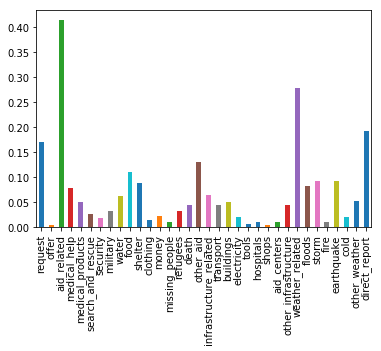

In [25]:
dfa.getNumericals().mean()[2:].plot(kind = 'bar')

In [26]:
genre_counts = df.groupby('genre').count()['message']
genre_counts

genre
direct    10766
news      13054
social     2396
Name: message, dtype: int64

In [34]:
type(genre_counts)

pandas.core.series.Series

In [27]:
genre_names = list(genre_counts.index)
genre_names

['direct', 'news', 'social']

In [49]:
topic_counts = pd.Series(df.select_dtypes(include=['float', 'int']).mean()[2:].sort_values(ascending=False))
#topic_counts.columns = 'test'
topic_counts

aid_related               0.414251
weather_related           0.278341
direct_report             0.193584
request                   0.170659
other_aid                 0.131446
food                      0.111497
earthquake                0.093645
storm                     0.093187
shelter                   0.088267
floods                    0.082202
medical_help              0.079493
infrastructure_related    0.065037
water                     0.063778
other_weather             0.052487
buildings                 0.050847
medical_products          0.050084
transport                 0.045812
death                     0.045545
other_infrastructure      0.043904
refugees                  0.033377
military                  0.032804
search_and_rescue         0.027617
money                     0.023039
electricity               0.020293
cold                      0.020217
security                  0.017966
clothing                  0.015449
aid_centers               0.011787
missing_people      

In [46]:
type(topic_counts)

pandas.core.series.Series

In [43]:
topic_names = list(topic_counts.index)
topic_names

['related',
 'request',
 'offer',
 'aid_related',
 'medical_help',
 'medical_products',
 'search_and_rescue',
 'security',
 'military',
 'water',
 'food',
 'shelter',
 'clothing',
 'money',
 'missing_people',
 'refugees',
 'death',
 'other_aid',
 'infrastructure_related',
 'transport',
 'buildings',
 'electricity',
 'tools',
 'hospitals',
 'shops',
 'aid_centers',
 'other_infrastructure',
 'weather_related',
 'floods',
 'storm',
 'fire',
 'earthquake',
 'cold',
 'other_weather',
 'direct_report']